In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel("Global Superstore.xlsx")

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [6]:
df.shape

(51290, 24)

In [7]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [8]:
df["Category"].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

<AxesSubplot:xlabel='Category', ylabel='Sales'>

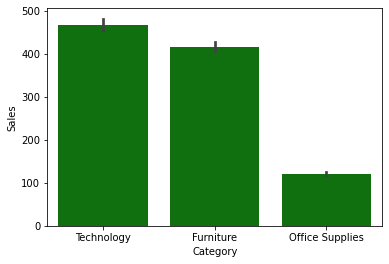

In [9]:
sns.barplot(x="Category",y="Sales",data=df,color="green")

<AxesSubplot:xlabel='Region', ylabel='Sales'>

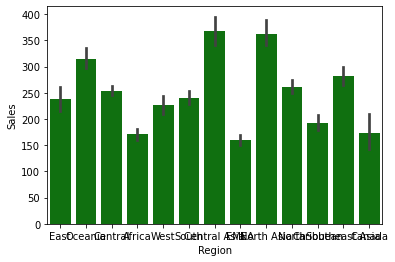

In [10]:
sns.barplot(x="Region",y="Sales",data=df,color="green")

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [12]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [14]:
df['Ship Mode']=le.fit_transform(df['Ship Mode'])

In [15]:
df['Customer Name']=le.fit_transform(df['Customer Name'])

In [16]:
df['Segment']=le.fit_transform(df['Segment'])

In [17]:
df['City']=le.fit_transform(df['City'])

In [18]:
df['State']=le.fit_transform(df['State'])

In [19]:
df['Country']=le.fit_transform(df['Country'])

In [20]:
df['Market']=le.fit_transform(df['Market'])

In [21]:
df['Region']=le.fit_transform(df['Region'])

In [22]:
df['Category']=le.fit_transform(df['Category'])

In [23]:
df['Sub-Category']=le.fit_transform(df['Sub-Category'])

In [24]:
df['Product Name']=le.fit_transform(df['Product Name'])

In [25]:
df['Order Priority']=le.fit_transform(df['Order Priority'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  int32         
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  int32         
 7   Segment         51290 non-null  int32         
 8   City            51290 non-null  int32         
 9   State           51290 non-null  int32         
 10  Country         51290 non-null  int32         
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  int32         
 13  Region          51290 non-null  int32         
 14  Product ID      51290 non-null  object        
 15  Ca

In [27]:
cols=["Order ID","Ship Mode","Customer ID","Postal Code","Row ID","Ship Date","Customer Name","Segment","City","State","Country","Market","Region","Category","Sub-Category","Product Name","Quantity","Discount","Profit","Shipping Cost","Order Priority","Product ID"]
df.drop(cols,axis=1,inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  51290 non-null  datetime64[ns]
 1   Sales       51290 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 801.5 KB


In [29]:
#df["Order Date"]=df["Order Date"].dt.date

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  51290 non-null  datetime64[ns]
 1   Sales       51290 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 801.5 KB


In [32]:
df.set_index("Order Date",inplace=True)
df.index

DatetimeIndex(['2012-07-31', '2013-02-05', '2013-10-17', '2013-01-28',
               '2013-11-05', '2013-06-28', '2011-11-07', '2012-04-14',
               '2014-10-14', '2012-01-28',
               ...
               '2014-11-29', '2014-06-09', '2012-12-28', '2014-05-30',
               '2014-08-05', '2014-06-19', '2014-06-20', '2013-12-02',
               '2012-02-18', '2012-05-22'],
              dtype='datetime64[ns]', name='Order Date', length=51290, freq=None)

In [33]:
df=df.sort_values("Order Date")

In [34]:
df.head()

,Sales
Order Date,
2011-01-01,66.120
2011-01-01,120.366
2011-01-01,408.300
2011-01-01,55.242
2011-01-01,44.865


In [43]:
y=df["Sales"].resample('W').mean()
y.head(10)

Order Date
2011-01-02    160.397571
2011-01-09    277.712725
2011-01-16    240.439579
2011-01-23    227.074337
2011-01-30    147.471429
2011-02-06    225.204903
2011-02-13    237.306056
2011-02-20    294.329500
2011-02-27    238.124735
2011-03-06    244.640569
Freq: W-SUN, Name: Sales, dtype: float64

In [44]:
y.isnull().sum()

0

In [45]:
y.shape

(210,)

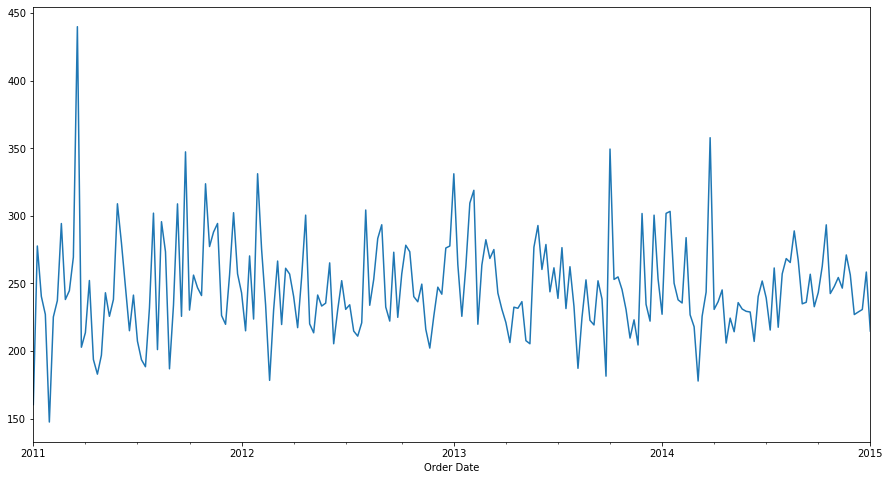

In [46]:
y.plot(figsize=(15,8))
plt.show()

In [47]:
import statsmodels.api as sm

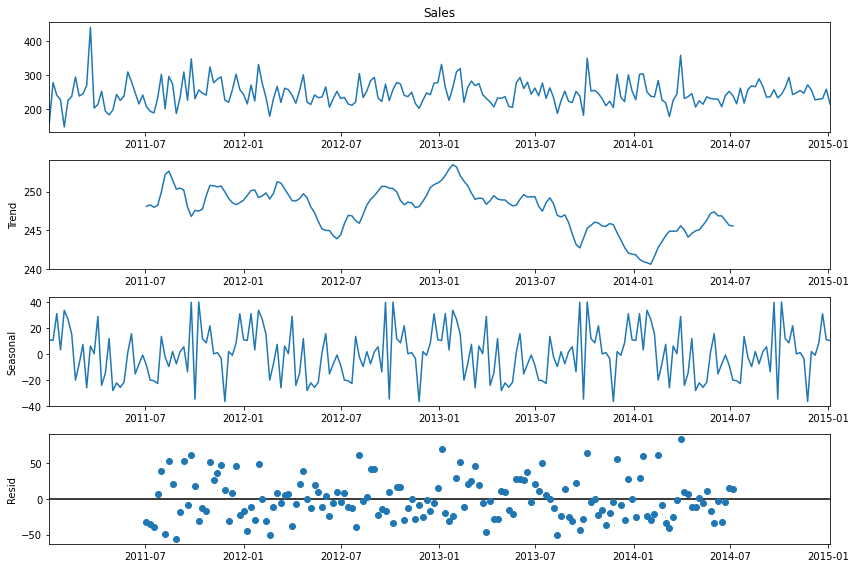

In [48]:
from pylab import rcParams
rcParams["figure.figsize"]=12,8
decomposition=sm.tsa.seasonal_decompose(y)
fig=decomposition.plot()
plt.show()

In [49]:
from statsmodels.tsa.stattools import  adfuller

In [50]:
from pandas import Series
from statsmodels.tsa.stattools import  adfuller
result=adfuller(y)
print("ADF Statistic: %F" % result[0])
print("p-value:%f" % result[1])
print("critical values:")
for key,value in result[4].items():
    print('\t%s: %.3f'%(key,value))

ADF Statistic: -13.180795
p-value:0.000000
critical values:
	1%: -3.462
	5%: -2.875
	10%: -2.574
